In [1]:
from sqlalchemy import *
import numpy as np
import pylab as plt
import pandas as pd
import peakutils

%matplotlib inline

In [8]:
engine = create_engine('sqlite+pysqlite:///../SQL/75_8b.db')

In [9]:
import time
start_time = time.time()
#ADCdf = pd.io.sql.read_sql("SELECT * FROM ADC", engine)
#Hitdf = pd.io.sql.read_sql("SELECT * FROM Hit", engine)
#PSAdf = pd.io.sql.read_sql("SELECT * FROM PSA", engine)
ProtoMapdf = pd.io.sql.read_sql("SELECT * FROM ProtoMap", engine)
RawADCdf = pd.io.sql.read_sql("SELECT * FROM RawADC", engine)
end_time = time.time()
print end_time-start_time

244.434041977


(-100, 100)

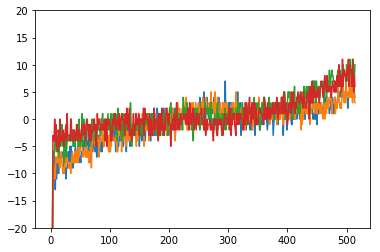

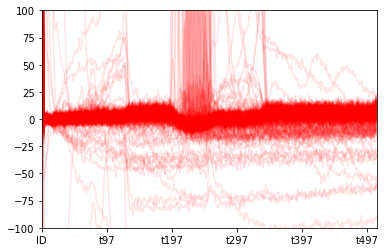

In [10]:
tmp = RawADCdf[(RawADCdf['EventID']==0)&(RawADCdf['PadNum']<0)].iloc[8:12]

plt.plot((tmp.values-tmp.median(axis=1).values[:,None]).T)
plt.ylim(-20,20)
plt.figure()
ADCdf[(ADCdf['EventID']==0)].T.plot(legend=None,  c=(1,0,0,0.1))
plt.ylim(-100,100)


In [11]:
import untangle
from collections import defaultdict
with open('LookupProto20150331.xml') as f:
    xml = f.read()
    doc = untangle.parse(xml)

    tmp = defaultdict(list)
    
    for one in doc.dataroot.LookupProto20150331:
        #tmp['ID'].append(int(one.ID.cdata))
        tmp['CoboID'].append(int(one.CoboID.cdata))
        tmp['AgetID'].append(int(one.AgetID.cdata))
        tmp['ChannelID'].append(int(one.ChannelID.cdata))
        tmp['PadID'].append(int(one.PadID.cdata))
    GetMap_df = pd.DataFrame(tmp)
    

In [12]:
doc.dataroot.LookupProto20150331[0].ID.cdata


u'1'

In [235]:
tmpdf1 = GetMap_df#['ChannelID'].values
tmpdf2 = RawADCdf[(RawADCdf['EventID']==10)]
tmpdf3 = pd.merge(tmpdf1,tmpdf2,right_on='PadNum',left_on='PadID')

(250, 500)

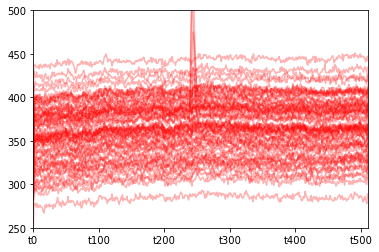

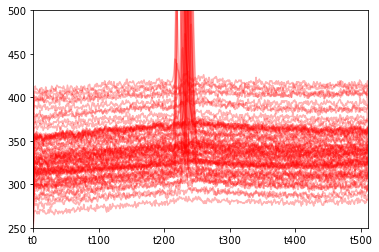

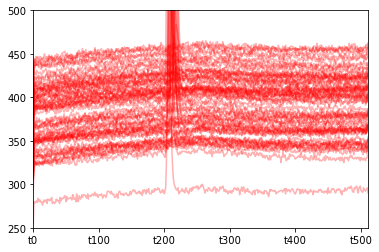

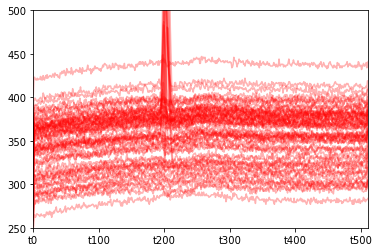

In [198]:
tmpdf3[tmpdf3['AgetID']==0].iloc[:,7:].T.plot(c=(1,0,0,0.3),legend=None);
plt.ylim(250,500)
tmpdf3[tmpdf3['AgetID']==1].iloc[:,7:].T.plot(c=(1,0,0,0.3),legend=None);
plt.ylim(250,500)
tmpdf3[tmpdf3['AgetID']==2].iloc[:,7:].T.plot(c=(1,0,0,0.3),legend=None);
plt.ylim(250,500)
tmpdf3[tmpdf3['AgetID']==3].iloc[:,7:].T.plot(c=(1,0,0,0.3),legend=None);
plt.ylim(250,500)

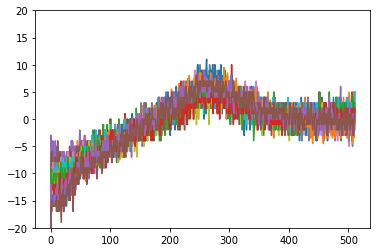

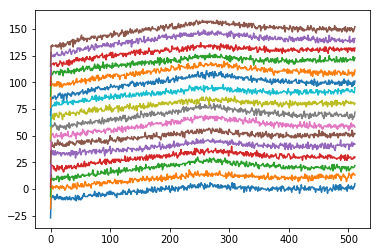

In [199]:
tmp = RawADCdf[(RawADCdf['EventID']==1)&(RawADCdf['PadNum']<0)].iloc[:16,3:]
plt.plot((tmp.values-tmp.median(axis=1).values[:,None]).T)

plt.ylim(-20,20)

plt.figure()
plt.plot((tmp.values-tmp.median(axis=1).values[:,None]+np.array(range(0,160,10))[:,None]).T);

#plt.ylim(350,450)


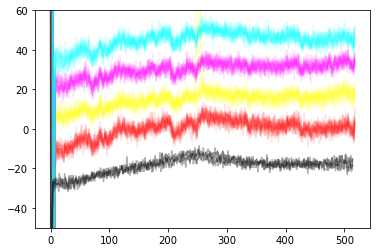

In [200]:
AID=0
tmp = tmpdf3[(tmpdf3['AgetID']==AID)&(tmpdf3['ChannelID']>=51)&(tmpdf3['ChannelID']<100)]
#tmp.T.plot(legend=None)
#plt.ylim(250,420)
#plt.figure()
plt.plot((tmp.values - tmp.iloc[:,10:].mean(axis=1).values[:,None]+[[0]]).T,c=(1,0,0,0.1));
plt.ylim(-50,60)
tmp = tmpdf3[(tmpdf3['AgetID']==AID)&(tmpdf3['ChannelID']>=-1)&(tmpdf3['ChannelID']<17)]
plt.plot((tmp.values - tmp.iloc[:,10:].mean(axis=1).values[:,None]+[[15]]).T,c=(1,1,0,0.1));
plt.ylim(-50,60)
tmp = tmpdf3[(tmpdf3['AgetID']==AID)&(tmpdf3['ChannelID']>=17)&(tmpdf3['ChannelID']<34)]
plt.plot((tmp.values - tmp.iloc[:,10:].mean(axis=1).values[:,None]+[[30]]).T,c=(1,0,1,0.1));
plt.ylim(-50,60)
tmp = tmpdf3[(tmpdf3['AgetID']==AID)&(tmpdf3['ChannelID']>=34)&(tmpdf3['ChannelID']<51)]
plt.plot((tmp.values - tmp.iloc[:,10:].mean(axis=1).values[:,None]+[[45]]).T,c=(0,1,1,0.1));
plt.ylim(-50,60)
tmp = RawADCdf[(RawADCdf['EventID']==2)&(RawADCdf['PadNum']<0)].iloc[:4]
tmp = tmp.values - tmp.mean(axis=1).values[:,None]-[[20]]
plt.plot(tmp.T,c=(0,0,0,0.3))

9.80288004875


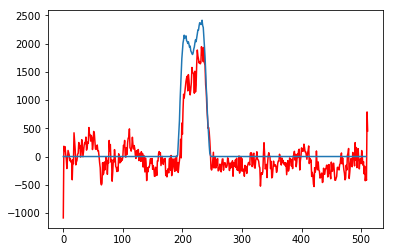

In [201]:
def Process(Event):
    mesh = Event.iloc[:,3:][Event.iloc[:,3:]>20].sum(axis=0)
    #print mesh
    return mesh
start_time = time.time()
mesh_df = ADCdf.groupby('EventID').apply(Process)
end_time = time.time()
print end_time-start_time
plt.plot(ADCdf[ADCdf['EventID']==2].sum(axis=0).values[3:],c='r')
plt.plot(mesh_df.iloc[2].values[3:])

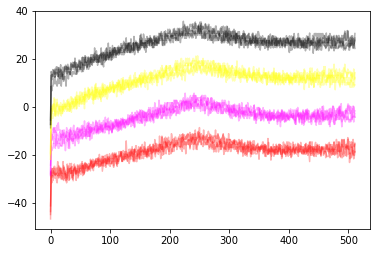

In [203]:
EID=2
tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[:4]
tmp = tmp.values - tmp.mean(axis=1).values[:,None]-[[20]]
plt.plot(tmp.T[3:],c=(1,0,0,0.3))
tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[4:8]
tmp = tmp.values - tmp.mean(axis=1).values[:,None]-[[20]]+[[15]]
plt.plot(tmp.T[3:],c=(1,0,1,0.3))
tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[8:12]
tmp = tmp.values - tmp.mean(axis=1).values[:,None]-[[20]]+[[30]]
plt.plot(tmp.T[3:],c=(1,1,0,0.3))
tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[12:16]
tmp = tmp.values - tmp.mean(axis=1).values[:,None]-[[20]]+[[45]]
plt.plot(tmp.T[3:],c=(0,0,0,0.3));

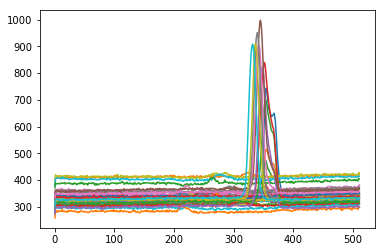

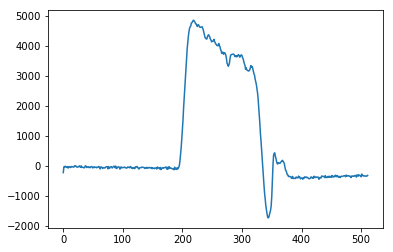

In [246]:
th=-0.1
EID=10
tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[:4,3:]
fpn = (tmp.values - tmp.mean(axis=1).values[:,None]).mean(axis=0)
tmp = (tmpdf3[tmpdf3['AgetID']==0].iloc[:,7:].values-[fpn])
diff = tmp[:,30:-30].max(axis=1)-tmp[:,30:-30].mean(axis=1)
std, mean = np.std(diff),np.mean(diff)
base = tmpdf3[tmpdf3['AgetID']==0][diff<mean+th*std].iloc[:,7:].values
tmp0 = (tmpdf3[tmpdf3['AgetID']==0].iloc[:,7:].values - [base.mean(axis=0)]).sum(axis=0)

tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[4:8,3:]
fpn = (tmp.values - tmp.mean(axis=1).values[:,None]).mean(axis=0)
tmp = (tmpdf3[tmpdf3['AgetID']==1].iloc[:,7:].values-[fpn])
diff = tmp[:,30:-30].max(axis=1)-tmp[:,30:-30].mean(axis=1)
std, mean = np.std(diff),np.mean(diff)
base = tmpdf3[tmpdf3['AgetID']==1][diff<mean+th*std].iloc[:,7:].values
tmp1 = (tmpdf3[tmpdf3['AgetID']==1].iloc[:,7:].values - [base.mean(axis=0)]).sum(axis=0)
plt.plot(base.T)


tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[8:12,3:]
fpn = (tmp.values - tmp.mean(axis=1).values[:,None]).mean(axis=0)
tmp = (tmpdf3[tmpdf3['AgetID']==2].iloc[:,7:].values-[fpn])
diff = tmp[:,30:-30].max(axis=1)-tmp[:,30:-30].mean(axis=1)
std, mean = np.std(diff),np.mean(diff)
base = tmpdf3[tmpdf3['AgetID']==2][diff<mean+th*std].iloc[:,7:].values
tmp2 = (tmpdf3[tmpdf3['AgetID']==2].iloc[:,7:].values - [base.mean(axis=0)]).sum(axis=0)

tmp = RawADCdf[(RawADCdf['EventID']==EID)&(RawADCdf['PadNum']<0)].iloc[12:16,3:]
fpn = (tmp.values - tmp.mean(axis=1).values[:,None]).mean(axis=0)
tmp = (tmpdf3[tmpdf3['AgetID']==3].iloc[:,7:].values-[fpn])
diff = tmp[:,30:-30].max(axis=1)-tmp[:,30:-30].mean(axis=1)
std, mean = np.std(diff),np.mean(diff)
base = tmpdf3[tmpdf3['AgetID']==3][diff<mean+th*std].iloc[:,7:].values
tmp3 = (tmpdf3[tmpdf3['AgetID']==3].iloc[:,7:].values - [base.mean(axis=0)]).sum(axis=0)
plt.figure()
plt.plot(np.array([tmp0,tmp1,tmp2,tmp3]).T.sum(axis=1))



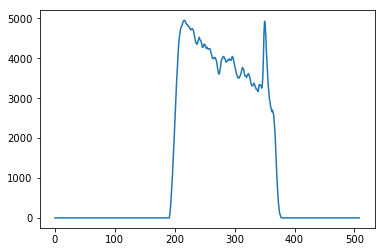

In [234]:
plt.plot(mesh_df.iloc[10].values[3:])